## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
# read the data file
df_ab = pd.read_csv('ab_data.csv')
df_ab.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df_ab.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df_ab.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
converted = df_ab.converted.mean()
converted

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# define df of users with landing_page= new page
new_page_df = df_ab[df_ab['landing_page']=='new_page']
# define df of users in the treatment group
trtmnt_df = df_ab[df_ab['group']=='treatment']
# define df of users who are new_page_df and in the treatment group
new_trtmnt_df = new_page_df[new_page_df['group']=='treatment']
# calculating the unmatching results by adding the difference
# of number of users in new_group_df from 1-new_page_df & 2-group_df
line_up = (new_page_df.shape[0] - new_trtmnt_df.shape[0]) + (trtmnt_df.shape[0] - new_trtmnt_df.shape[0])
line_up

3893

f. Do any of the rows have missing values?

In [7]:
# using the command below, no missing values
# since number of non null values of each column
# equals the total number of entries
df_ab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# temporary df to holds data to be deleted (users in control group with new page) 
tempA = df_ab[((df_ab['group'] == 'control') & (df_ab['landing_page'] == 'new_page'))]
# temporary df to holds data to be deleted (users in tratment group with old page) 
tempB = df_ab[((df_ab['group'] == 'treatment') & (df_ab['landing_page'] == 'old_page'))]
# drop tempA from original df (df_ab)
df2 = df_ab.drop(tempA.index)
# drop tempB from df2
df2 = df2.drop(tempB.index)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()['user_id']

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# count the occurance of each user id in df2
id_counts = df2['user_id'].value_counts()

# get the repeated id by returning the index (id) of the 
#element (# occurances) in pandas series id_counts of value 2 
repeated_id = id_counts[id_counts==2].index[0]
repeated_id
# The repeated user_id is 773192

773192

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id']==repeated_id]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# the repeated user id entries have different 
# timestamp so I can't use .drop_duplicate()
df2 = df2.drop(2893)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
# p(converted) = mean of convertion rate
converted = df2.converted.mean()
converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# p(converted|control) = P(converted&control)*p(control)
conv_ctrl_df = df2[((df2['group'] == 'control') & (df2['converted'] == 1))]
ctrl_df = df2[df2['group'] == 'control']
np.multiply(conv_ctrl_df.converted.mean(),ctrl_df.converted.mean())

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# p(converted|treatment) = p(converted&treatment)*p(treatment)
conv_trtmnt_df = df2[((df2['group'] == 'treatment') & (df2['converted'] == 1))]
trtmnt_df = df2[df2['group'] == 'treatment']
np.multiply(conv_trtmnt_df.converted.mean(),trtmnt_df.converted.mean())

0.11880806551510564

d. What is the probability that an individual received the new page?

In [17]:
# p(new_page) = mean of having new page
new_df = df2.query('landing_page == "new_page"')
np.divide(new_df.shape[0],df2.shape[0])

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

p(converted|control) is 0.120 which is a little bit higher than p(converted|treatment),0.1188, so there is no suffecient evidence to conclude that the new treatment page leads to more conversions. It is the other way around, having old page or being in the control group leads to more conversions.


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$H{null}$:  $P{new}$ -  $P{old}$  <= 0 <br>
$H{alt}$:  $P{new}$  -  $P{old}$  >0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
# Since we are looking at a null so there is no 
# difference in conversion based on the page,which 
# means the conversions for each page are the same.
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br>

In [19]:
# Since we are looking at a null so there is no 
# difference in conversion based on the page,which 
# means the conversions for each page are the same.
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
# I'm reusing trtmnt that defined above as this:
# trtmnt_df = df2[df2['group'] == 'treatment']
# see part 2, Q# c
n_new = trtmnt_df.shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
# I'm reusing trtmnt that defined above as this:
# ctrl_df = df2[df2['group'] == 'control']
# see part 2, Q# b
n_old = ctrl_df.shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.binomial(1, p_new,  n_new)
new_page_converted.mean()

0.11851214644553025

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.binomial(1, p_old,  n_old)
old_page_converted.mean()

0.11819045390090449

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.00032169254462575958

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
## Here what I'm trying to
## achieve is to have a sample mean of size 200 
## and repeat that process 10000 times. I don't want 
## a a 10000 sample size.
### But This is The Old way. See Below for the updated one
### using vectorizing techniques.


# p_diffs = []
# size = 200

# for _ in range(10000):
#     sample = df2.sample(size, replace=True)
#     new_df = sample.query('landing_page == "new_page"')
#     old_df = sample.query('landing_page == "old_page"')
#     p_new = new_df.converted.mean()
#     p_old = old_df.converted.mean()
    
#     new_page_converted = np.random.choice([0,1],n_new, p=(p_new,1-p_new))
#     old_page_converted = np.random.choice([0,1],n_old, p=(p_old,1-p_old))
#     obs_diff = new_page_converted.mean() - old_page_converted.mean()
#     p_diffs.append(obs_diff)
    
# p_diffs = np.array(p_diffs)

In [26]:
new_converted_simulation = np.random.binomial(n_new, p_new,  10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old,  10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

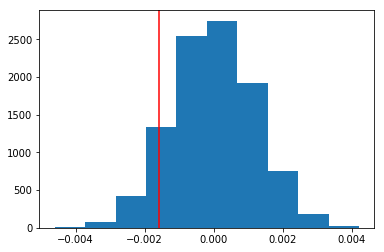

In [27]:
# I expected the histogram to be normally distributed
# due to the centeral limit theorem 
obs_diff = trtmnt_df.converted.mean() - ctrl_df.converted.mean()
plt.hist(p_diffs);
plt.axvline(x=obs_diff, color='red');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [28]:
(p_diffs>obs_diff).mean()

0.90539999999999998

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

The computed value in part j is called p-value. This value helps to decide wither to reject or fail to reject the null heypothesis. It means that old page perfoms better since the p-value higher than 0.05 (Type I error). So with this value we fail to reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [29]:
import statsmodels.api as sm
# n_old and n_new are already computed above.
# See part 2, Q# c and d

# also to promote reusability in the code
#old page means control group and
# new page means treatment group so using each
# character is ok.
convert_old = ctrl_df.converted.mean()
convert_new = trtmnt_df.converted.mean()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [30]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old])
z_score, p_value

(-0.0032875796753531767, 0.99737689565979126)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

The null hypothesis is that there is no difference between the two proportions.
The alternative is that there is a statistical difference between the two proportions. 
since the z-score falls in the inter between  -1.96 or 1.96 we can say that old page and new page factor is statistically significant. And the p-value is greater than type 1 error, it means that old pages performa better.
Yes, they agree with the result computed in part j and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

logistic regression

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [31]:
df2['intercept'] = 1
df2[['ab_page','non_ab']] = pd.get_dummies(data=df2['group'])
df2 = df2.drop(['non_ab','group'], axis=1)
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,1
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,1
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,0
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [32]:
logit_mod = sm.Logit(df2['ab_page'], df2[['intercept', 'converted']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.783557
         Iterations 3


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                ab_page   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 04 Feb 2019   Pseudo R-squ.:                 -0.1048
Time:                        18:31:24   Log-Likelihood:            -2.2769e+05
converged:                       True   LL-Null:                   -2.0610e+05
                                        LLR p-value:                     1.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0020      0.004     -0.516      0.606      -0.010       0.006
converted      0.0150      0.011      1.311      0.190      -0.007       0.037
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In the logistic regression the null and alternative hypotheses are:
H0: p_old = p_new and,
Ha: p_old != p_new 
while in part II both hypotheses were directional:
H_null:pold≥pnew and,
H_a:pold<pnew

This difference in the hypotheses in part 2 and 3 resulted in different p-values. In part 2, we were studing the landing page factor on the conversion rate and actually the resuls lead to that the old page is better.

The reason of this difference is that the heypothese in part II is one tailed and the hypotheses in part III is two tailed

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is good to consider other factors in my regression model to be strong model, more understandabl, and yeild accurate predictives and other business insights. The main benefit is to check that there are no confounding variables that are impacting our ability to identify the main interest effect in the case of this work. For example, each country may have different preferences regarding the webpage layout.

The disadvantage is related to the curse of dimensionality. Also, the considred factores in the model may result to false interperted. The many will add higher powers to our model equation. Also, some of the factors or variables are not statistically significant but with adding other factores they become statitically significant.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
df_ctr = pd.read_csv('countries.csv')
df2 = df2.merge(df_ctr, on='user_id', how='inner')
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,1,US
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,1,US
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,0,US
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,0,US
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,1,US


In [35]:
df2[['uk','us', 'ca']] = pd.get_dummies(data=df2['country'])
df2 = df2.drop(['country', 'ca'], axis=1)
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page,uk,us
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,0,0,0
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,0,0,0
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,1,0,0


In [36]:
logit_mod = sm.Logit(df2[['converted']], df2[['intercept', 'ab_page', 'uk', 'us']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [37]:
# As you can see from below summary, old page is better 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 04 Feb 2019   Pseudo R-squ.:               2.323e-05
Time:                        18:31:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
ab_page        0.0149      0.011      1.307      0.191      -0.007       0.037
uk            -0.0408      0.027     -1.516      0.130      -0.093       0.012
us             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

In [38]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0

# Conclusion

They should not launch the new page or they have to do more analysis with other factors other than the g